Names:

Joseph Arteaga  
Jospeh Carpio  
Joseph Lee  
Hudson Whipple

# Classification Model to Predict Product Category From Retail Transactions

## The problem and the significance

Problem: Businesses are always trying to find ways to improve revenue. By using a business's data set, we can find trends in what consumers buy.

Significance: By predicting what consumers buy, it allows businesses improve revenue by saving money on analysis on consumer trends and increases 
profit through applying the predictions to recommendation systems.


## About The Dataset
The dataset is obtained from Kaggle and is formatted in a .csv file. It contains 302,010 records and 30 attributes.

 The goal is to predict what product category was purchased given information about a transaction. This classification can help highlight 
 consumer traits that relate to the product category they are most likely to purchase from. 

https://www.kaggle.com/datasets/bhavikjikadara/retail-transactional-dataset

**Features**

1. Transaction_ID - Identifier of the transaction
1. Customer_ID - Identifier of customer
1. Name - Name of customer
1. Email - Email used by customer
1. Phone - Phone number of customer
1. Address - Physical address of residence of customer
1. City - City of residence of customer
1. State - State of residence of customer
1. Zipcode - Zipcode of residence of customer
1. Country - Country of residence of customer
1. Age - Age of customer
1. Gender - Gender of customer
1. Income - Income bracket of customer
1. Customer_Segment - Classification of customer (New, Regular, Premium)
1. Date - Month/Day/Year of purchase
1. Year - Year of purchase
1. Month - Month of purchase
1. Time - Time of day of purchase
1. Total_Purchases - Total purchases made by customer
1. Amount - Money spent by customer to purchase product
1. Total_Amount - Total money spent made by customer
1. Product_Category - Category of the product
1. Product_Brand - Brand of product
1. Product_Type - The type/model of the product
1. Feedback - Customer Feedback related to the product or delivery service
1. Shipping_Method - Method of delivery
1. Payment_Method - Method of payment
1. Order_Status - Status of the order whether it is shipped, delivered, or canceled
1. Ratings - 1-5 Rating of the product/delivery
1. Products - The product purchased

**Application**

Predictions can be used for recommending products that can be paired with the original transaction.
For example, if a customer purchases a shirt, this model can be used to predict when a customer will purchase a shirt and, then, we can 
recommend either a jacket or pants.

If the customer purchases a large appliance or an appliance that does not require repurchasing in long time periods such as HVAC equipment or 
Kitchen equipment, we can offer services such as maintenance or repair after a certain period of time when we can guarantee some form of damage.

If the customer purchases a small consumable, such as chocolate or water, we can recommend that same product after a short amount of time, such 
as a week or a reasonable time span proportional to the size of the consumable.


**Overall**

Applying machine learning techniques on a dataset about the information of customers allows predictions on future purchases. With these 
predictions, we can extrapolate more applications by using predictions to recommend pairing purchases, selling services, and prompting reordering the same item.


## Imports

In [32]:
# General
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import numpy as np

# Feature Engineering 
from imblearn.over_sampling import SMOTE

# Data Prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Model Fitting
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model Analysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Reading the Dataset

In [33]:
data = pd.read_csv('retail_data.csv')
data.shape

(302010, 30)

In [34]:
data.head(10)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
5,6095326.0,41289.0,Ryan Johnson,Haley12@gmail.com,3.292677e+09,532 Ashley Crest Suite 014,Brisbane,New South Wales,74430.0,Australia,...,1185.167224,Electronics,Apple,Tablet,Good,Express,PayPal,Pending,4.0,Lenovo Tab
6,5434096.0,97285.0,Erin Lewis,Arthur76@gmail.com,1.578355e+09,600 Brian Prairie Suite 497,Kitchener,Ontario,47545.0,Canada,...,630.115295,Electronics,Samsung,Television,Bad,Standard,Cash,Processing,1.0,QLED TV
7,2344675.0,26603.0,Angela Fields,Tanya94@gmail.com,3.668096e+09,237 Young Curve,Munich,Berlin,86862.0,Germany,...,46.588070,Clothing,Zara,Shirt,Bad,Same-Day,Cash,Processing,1.0,Dress shirt
8,4155845.0,80175.0,Diane Clark,Martin39@gmail.com,6.219780e+09,8823 Mariah Heights Apt. 263,Wollongong,New South Wales,39820.0,Australia,...,2630.714413,Grocery,Nestle,Chocolate,Bad,Same-Day,Cash,Delivered,1.0,Dark chocolate
9,4926148.0,31878.0,Lori Bell,Jessica33@gmail.com,6.004895e+09,6225 William Lodge,Cologne,Berlin,64317.0,Germany,...,3976.112295,Home Decor,Home Depot,Decorations,Excellent,Standard,Cash,Delivered,4.0,Candles


Displays which features the raw dataset contains

In [35]:
print ("\nData Columns\n", data.columns)


Data Columns
 Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


## Data Cleaning

Attributes with personal information are removed as they cannot be generalized to a classification model and are therefore not necessary. Similarly, attributes such as Date and Zipcode are redundant being that they can be derived from other attributes. Apart from that, attributes such as Ratings, Feedback, and Time are something that can be attributed to any particular product category so they do not provide relevant information when classifying product category.

Attributes with personal information such as Name, Email, Phone will not be used for the predictions. Though, there is may be some underlying trends that can be predicted and captured through analyzing Name (https://psycnet.apa.org/record/2023-75670-001?doi=1), how a person makes their email, and how their phone number influences purchases. However, such task would require advanced techniques and more data, thus out of scope of this class and dataset, respectively. Additionally, suppose we do use Name, Email, Phone, because this is not a continuous variable, One-Hot encoding is our best approach. By nature of names, emails, and phones, for a dataset of 300 thousand entries, it would expand the dataset dramatically. More importantly, overall, this is overfitting as the trends with Name, Email, Phone are meaningless and are just a coincidence. 

We drop Date, Year, Month, and Time as same argument as above, there is a lot of unique values for each feature listed, making the dataset too large when we one-hot encode. Also, while there are trends that can be captured such as increases purchases of chocolate near Valentines Day (February 14th) or Christmas (December 25th), it is not significant in the scope of what we are trying to achieve. Though, revisiting with better equipment and techniques, can we try involving the date and time to the dataset, i.e. we revisit this project after more practice with Machine Learning?

City, State, Country, Address, Zipcode same argument as above.

Transaction ID, Customer ID, and Order Status are arbitrary and may not help, may even hinder, the model as these numbers are either independent to the product or are a consequence of the purchase rather than the cause.

Feedback and Ratings is removed as Feedback is descriptive words, which requires NLP to be able to turn them into some score. It may be argued that Feedback and Ratings are the same, where Feedback is the word description of Ratings, however Feedback is more useful as we can extrapolate more information than Ratings, but obtaining that information from Feedback is out of scope (for now, if we revisit). Ratings, while good ratings may influence whether you buy a product or not, it is more dependent on the brand. For example, suppose a customer wants to order a shirt, they are not going to look at ratings of the shirt to see if they buy it, rather they would look at the brand of the shirt. As such, if we were trying to predict Product Brand, then we consider rating, otherwise, we are not.

Products, we aim to predict Product Subcategory (added later through feature engineering). We remove products (along with Product Type, explained later) as it is a clear indicator of what we are trying to predict. But to put it simply, Product Type is too general and Product is too specific. The former is "too easy" and the latter is "too complicated" (in the scope of the project).

In [36]:
# data = data.drop(columns=['City', 'State', 'Zipcode', 'Country', 'Transaction_ID', 'Customer_ID', 'Address', 'Name', 'Email', 'Phone', 'Order_Status', 'Payment_Method', 'products', 'Year', 'Month', 'Time'])
data = data.drop(columns=['City', 'State', 'Country', 'Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode', 'Date', 'Year', 'Month', 'Time', 'Feedback', 'Order_Status', 'Ratings', 'products'])

data.columns

Index(['Age', 'Gender', 'Income', 'Customer_Segment', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Shipping_Method', 'Payment_Method'],
      dtype='object')

Here we simply drop any records with NaNs as our dataset is large enough where we can ignore trying to do forward fill or closest record.

We notice that only 1% of the records contain a NaN, we decided to just drop the records with NaN values as attempting to 
forward fill or use similar records to fill the NaNs would take too much time and resources. Since we are dealing with 
300 thousand records, and only 1% records contain NaNs, dropping those records will not impact the overall predictions 
by a significant amount.

In [37]:
rows_with_nans = data[data.isna().any(axis=1)]

print("\nNumber of NaN Values Per Feature\n")
print(data.isnull().sum())

print("Percent Records that have atleast 1 NaNs: ", ((len(rows_with_nans) / len(data)) * 100))

data = data.dropna()
data.shape


Number of NaN Values Per Feature

Age                 173
Gender              317
Income              290
Customer_Segment    215
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Shipping_Method     337
Payment_Method      297
dtype: int64
Percent Records that have atleast 1 NaNs:  1.076123307175259


(298760, 12)

## Data Exploration

Describing the statistics of the numerical values in the dataset.

In [38]:
data.describe()

,Age,Total_Purchases,Amount,Total_Amount
count,298760.000000,298760.000000,298760.000000,298760.000000
mean,35.471603,5.359596,255.133172,1367.480796
std,15.021781,2.868686,141.381368,1128.786521
min,18.000000,1.000000,10.000219,10.003750
25%,22.000000,3.000000,132.856642,438.753970
50%,32.000000,5.000000,255.424443,1040.946745
75%,46.000000,8.000000,377.587673,2029.599814
max,70.000000,10.000000,499.997911,4999.625796


Showcase the number of unique values and the actual unique values per feature

In [39]:
unique_counts = data.nunique()

print("Number of unique values per attribute")
print(unique_counts)

Number of unique values per attribute
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Total_Purchases         10
Amount              296425
Total_Amount        296429
Product_Category         5
Product_Brand           18
Product_Type            33
Shipping_Method          3
Payment_Method           4
dtype: int64


In [40]:
# Display all possible values for each feature
for column in data.columns:
    unique_values = data[column].unique()
    
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in 'Age':
[21. 19. 48. 56. 22. 58. 29. 46. 25. 64. 31. 53. 32. 43. 69. 49. 61. 41.
 38. 59. 20. 67. 50. 26. 66. 24. 54. 28. 34. 65. 40. 68. 36. 57. 27. 35.
 70. 37. 30. 39. 47. 18. 60. 33. 62. 42. 44. 51. 63. 55. 23. 52. 45.]
--------------------------------------------------
Unique values in 'Gender':
['Male' 'Female']
--------------------------------------------------
Unique values in 'Income':
['Low' 'High' 'Medium']
--------------------------------------------------
Unique values in 'Customer_Segment':
['Regular' 'Premium' 'New']
--------------------------------------------------
Unique values in 'Total_Purchases':
[ 3.  2.  7.  4.  1.  8. 10.  9.  6.  5.]
--------------------------------------------------
Unique values in 'Amount':
[108.0287567 403.3539073 354.4775997 ... 415.4162595 493.6032674
 200.0024142]
--------------------------------------------------
Unique values in 'Total_Amount':
[ 324.08627    806.7078147 1063.432799  ... 4154.162595  2468.016337
 1800.0

Here we are analyzing the percent makeup of each unique value in each feature

In [41]:
# Display the distribution of values within each feature
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True) * 100

    print(f"Percentage of unique values in '{column}':")
    print(value_counts)
    print("-" * 50)

Percentage of unique values in 'Age':
Age
20.0    11.489490
46.0    10.162672
26.0     8.188847
22.0     7.629870
34.0     6.839604
23.0     5.985406
19.0     5.586089
21.0     2.673383
24.0     2.053488
55.0     1.806467
48.0     1.526309
70.0     0.906748
43.0     0.894698
59.0     0.891016
36.0     0.888338
68.0     0.884657
33.0     0.880305
64.0     0.875285
56.0     0.875285
30.0     0.871603
44.0     0.871603
65.0     0.868925
60.0     0.867586
62.0     0.866582
40.0     0.863235
47.0     0.862900
52.0     0.860222
41.0     0.858214
28.0     0.857545
50.0     0.857210
39.0     0.857210
25.0     0.856540
35.0     0.855536
69.0     0.854867
57.0     0.854867
58.0     0.854197
61.0     0.853863
37.0     0.853193
49.0     0.852858
38.0     0.852858
42.0     0.852858
63.0     0.852524
27.0     0.852189
45.0     0.847838
51.0     0.846499
53.0     0.842817
67.0     0.842482
29.0     0.841813
32.0     0.839470
54.0     0.831771
18.0     0.823069
66.0     0.820726
31.0     0.816374
Name

### Univariate Analysis

We showcase the number of transactions per Product_Type, here we see a lot of Product_Type, we intend to predict a much encompassing label that captures just as much data as Product_Type without the risk of a lowered accuracy due to a high number of class labels as it can introduce overfitting in order to make a correct prediction. This will be addressed later on.

<Axes: title={'center': 'Number of Transactions per Product'}, xlabel='Product_Type', ylabel='Number of Transactions'>

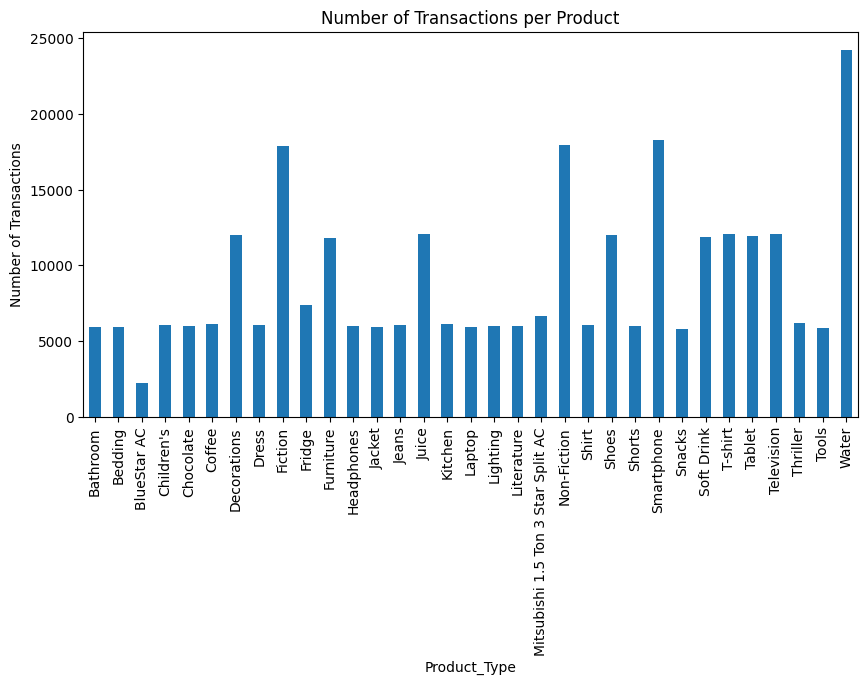

In [42]:
# Product Type Distribution
plt.figure(figsize=(10, 5))
plt.xlabel('Product Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Product')
data.groupby('Product_Type').size().plot.bar()

This analyzes the consumer demographic in regards to what kind of customer they are. Knowing a near majority of the customers being regulars and a respective portion being Premium customers, we can count that implementing the model will have a great impact. This is due to the Regular and Premium are customers that the business has a lot of data on, in other words, more data to make predictions on what kind of different products they can buy.

<Axes: title={'center': 'Customer Segment Distribution'}, ylabel='count'>

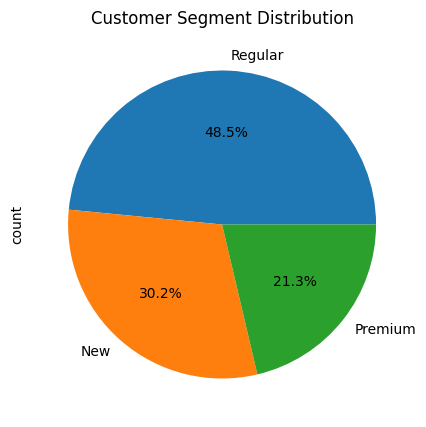

In [43]:
# Customer Segment Breakdown
plt.figure(figsize=(5, 5))
data['Customer_Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Customer Segment Distribution')

We plot the ages of the customers, using psychology and stages in life of the customer, we can see trends of customers in what products are being bought.

For example, people in their early 20s could buy more clothes and food items.
Another example, people in their late 30s and beyond would buy HVAC as they are either buying homes or already have homes that need renovating.

<Axes: title={'center': 'Number of Transactions per Age'}, xlabel='Age', ylabel='Number of Transactions'>

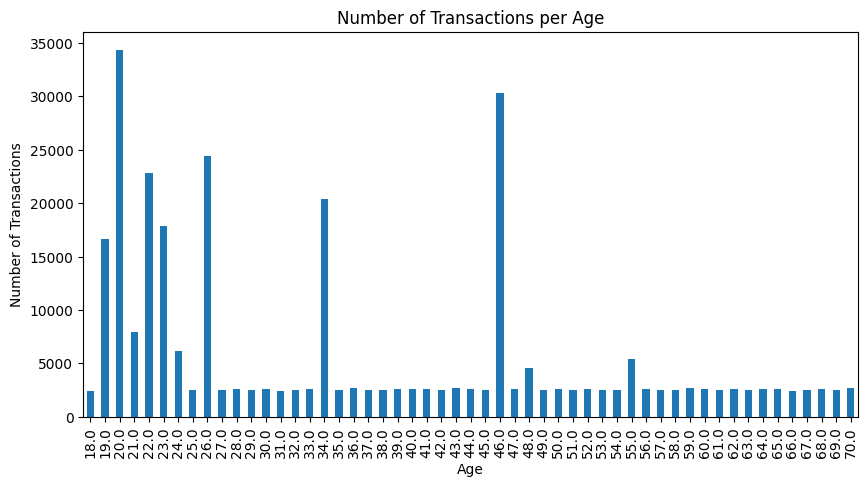

In [44]:
# Age Distribution
plt.figure(figsize=(10, 5))
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Age')
data.groupby('Age').size().plot.bar()

Here we plot the Product Category, the largest encompassing descriptor on the products, this is to see how balanced the products are. However, we could use this as the class label, but these values do not necessarily capture "enough" information on what the product is, so while it can show trends, it does not tell businesses which specific products to buy more or to put more effort in within their recommendation system. This is addressed later on.

<Axes: title={'center': 'Product Category Distribution'}, ylabel='count'>

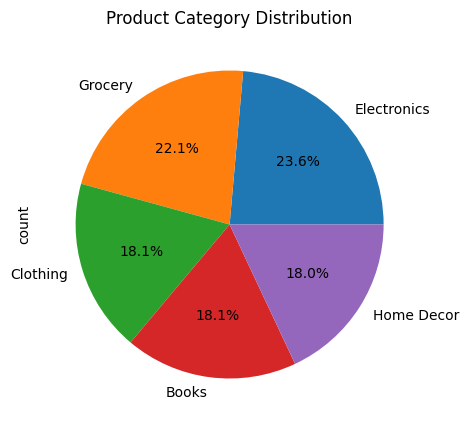

In [45]:
# Product Category Distribution
plt.figure(figsize=(5, 5))
data['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')

### Bivariate Analysis

Here we see the payment type versus total transaction amount, since the box plots are basically the same, we have a really stable total transaction amount and stable payment type in the database 

Text(0, 0.5, 'Total Transaction Amount')

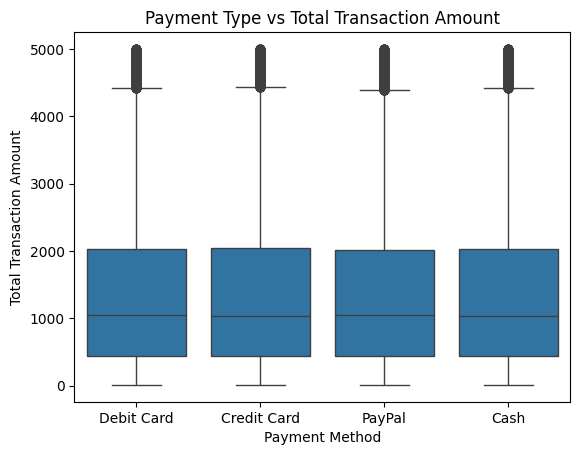

In [46]:
# Payment Method vs Total Transaction Amount
sns.boxplot(data, x='Payment_Method', y='Total_Amount')
plt.title('Payment Type vs Total Transaction Amount')
plt.xlabel('Payment Method')
plt.ylabel('Total Transaction Amount')

We showwcase the number of brands per product category, when implementing the predictive model, the business can know how to prepare to buy/prepare products from their respective brands. In other words, if the model predicts electronics, the business can know how many businesses they can contact.

C:\Users\josep\AppData\Local\Temp\ipykernel_46360\2741129979.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groups, x='Product_Category', y='Brand_Count', palette='autumn')


Text(0.5, 1.0, 'Number of Brands per Product Category')

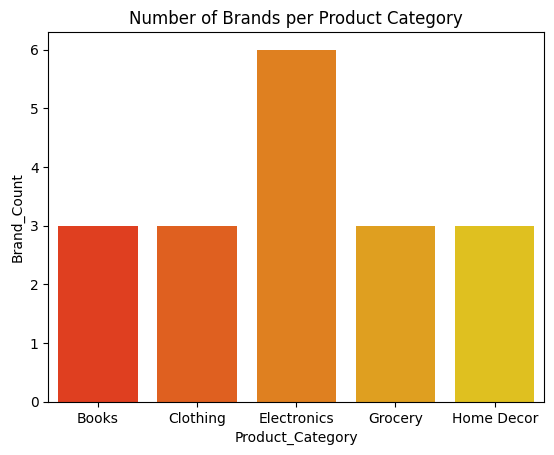

In [47]:
# Number of Brands per Product Category
groups = data.groupby('Product_Category')['Product_Brand'].nunique().reset_index()
groups.rename(columns={'Product_Brand': 'Brand_Count'}, inplace=True)

sns.barplot(data=groups, x='Product_Category', y='Brand_Count', palette='autumn')
plt.title("Number of Brands per Product Category")

Similar to above, but in the context of knowing what products to buy when implementing the model.

C:\Users\josep\AppData\Local\Temp\ipykernel_46360\794738559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groups, x='Product_Category', y='Type_Count', palette='autumn')


Text(0.5, 1.0, 'Number of Product Types per Product Category')

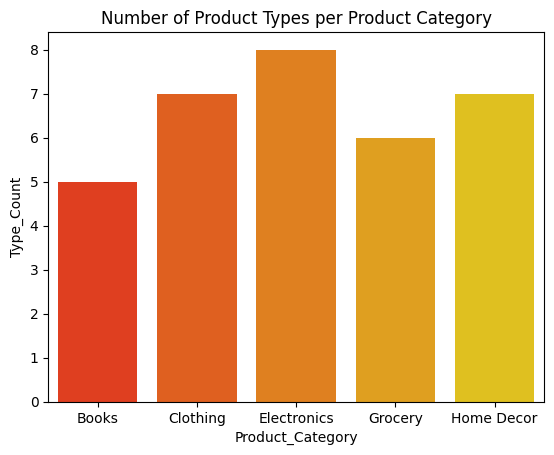

In [48]:
# Product Type vs Product Category
groups = data.groupby('Product_Category')['Product_Type'].nunique().reset_index()
groups.rename(columns={'Product_Type': 'Type_Count'}, inplace=True)

sns.barplot(data=groups, x='Product_Category', y='Type_Count', palette='autumn')
plt.title("Number of Product Types per Product Category")

### Multivariate Analysis

ARTEAGA

Text(0.5, 1.0, 'Transaction Amount by Product Category and Customer Segment')

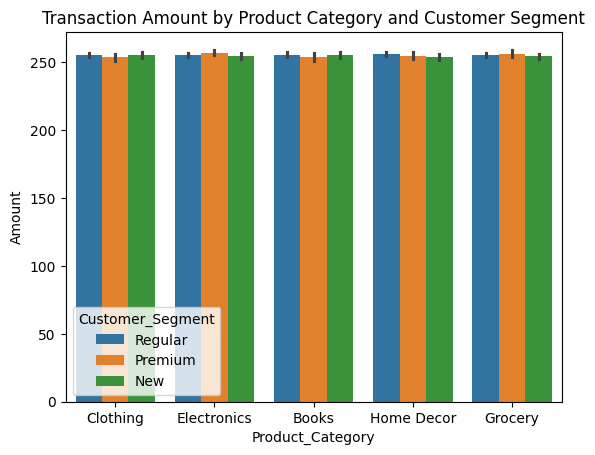

In [49]:
# Product Category vs Amount vs Customer Segment
sns.barplot(data=data, x='Product_Category', y='Amount', hue='Customer_Segment')
plt.title("Transaction Amount by Product Category and Customer Segment")

ARTEAGA

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

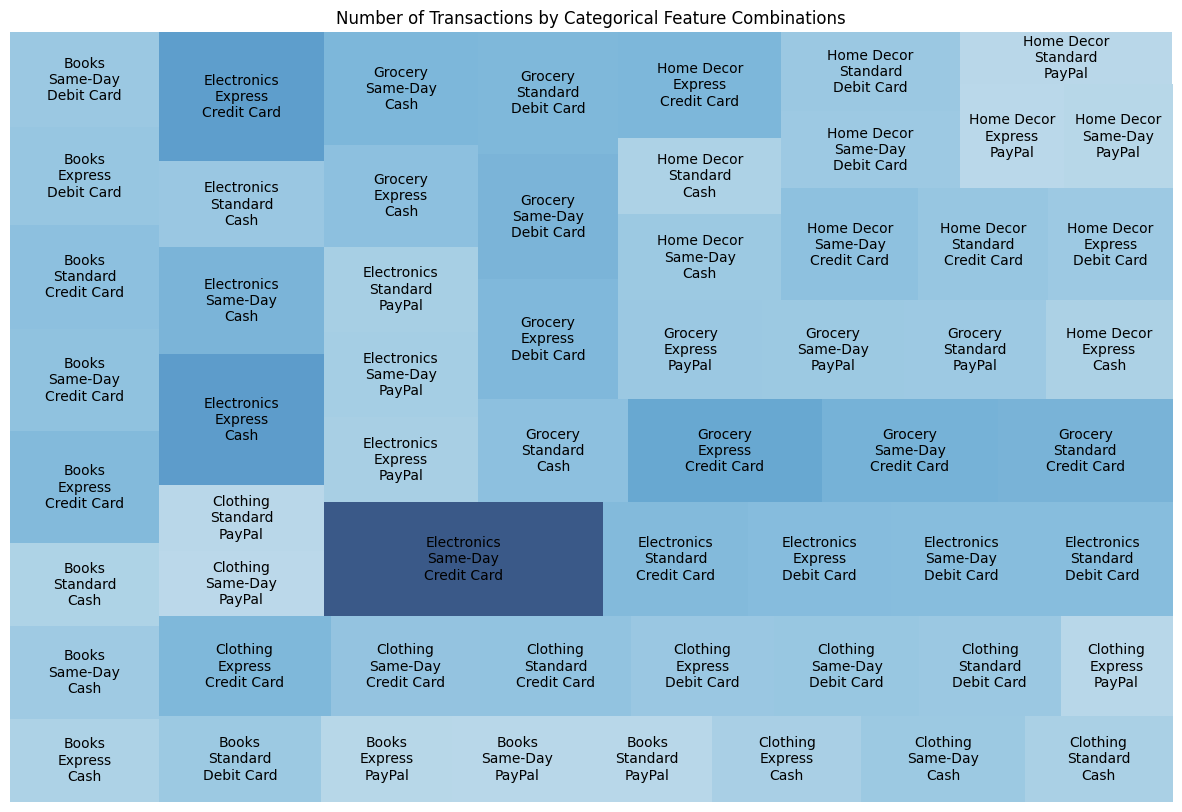

In [50]:
# Heatmap of Transaction Distribution by Categoricals
groups = data.groupby(['Product_Category', 'Payment_Method', 'Shipping_Method']).size().reset_index(name='count')

normalize_counts = np.array(groups['count']) / max(groups['count'])
cmap = plt.cm.Blues
colors = [cmap(value) for value in normalize_counts]


plt.figure(figsize=(15, 10))
squarify.plot(
    sizes=groups['count'], 
    label=groups['Product_Category'] + "\n" + groups['Shipping_Method'] + "\n" + groups['Payment_Method'], 
    color=colors,
    alpha=0.8
)
plt.title("Number of Transactions by Categorical Feature Combinations")
plt.axis("off")

## Feature Engineering

### Product_Type Mapping

Here we feature engineer our class labels: Product_Subcategory.

Our reasoning was briefly mentioned in the earlier cells. Product_Category does not tell a lot of which specific products under each category is being predicted, we only know what "family" the customer will buy a product from. Product_Type contains a bit too much class labels, as a result, if we attempt to train a model, it will end up not having a good enough accuracy. Alternatively, it may cause overfitting and will not capture the overall trend in customers.

We drop Product_Type since it will be highly correlated to what we are predicting, causing a dataleak since Product_Subcategory are reliant on Product_Type.

In [51]:
item_to_category = {
    'Water': 'Drink',
    'Juice': 'Drink',
    'Soft Drink': 'Drink',
    'Coffee': 'Drink',
    'Chocolate': 'Food',
    'Snacks': 'Food',
    'Non-Fiction': 'Media',
    'Fiction': 'Media',
    'Thriller': 'Media',
    'Literature': 'Media',
    'Television': 'Media',
    'Mitsubishi AC': 'HVAC',
    'BlueStar AC': 'HVAC',
    'Mitsubishi 1.5 Ton 3 Star Split AC': 'HVAC',
    'Fridge': 'Kitchen Equipment',
    'Kitchen': 'Kitchen Equipment',
    'T-shirt': 'Upper Body Clothing',
    'Shirt': 'Upper Body Clothing',
    'Dress': 'Upper Body Clothing',
    'Jacket': 'Upper Body Clothing',
    'Shoes': 'Lower Body Clothing',
    'Jeans': 'Lower Body Clothing',
    'Shorts': 'Lower Body Clothing',
    'Decorations': 'Home Decor',
    'Furniture': 'Home Decor',
    'Lighting': 'Home Decor',
    'Bathroom': 'Home Decor',
    'Bedding': 'Home Decor',
    'Smartphone': 'Electronics',
    'Tablet': 'Electronics',
    'Headphones': 'Electronics',
    'Laptop': 'Electronics',
    'Children\'s': 'Children\'s',
    'Tools': 'Tools'
}

data['Product_Subcategory'] = data['Product_Type'].map(item_to_category)
last_8_columns = data[: -8]
print(last_8_columns.head())

data = data.drop(columns=['Product_Type'])

    Age  Gender Income Customer_Segment  Total_Purchases      Amount  \
0  21.0    Male    Low          Regular              3.0  108.028757   
1  19.0  Female    Low          Premium              2.0  403.353907   
2  48.0    Male    Low          Regular              3.0  354.477600   
3  56.0    Male   High          Premium              7.0  352.407717   
4  22.0    Male    Low          Premium              2.0  124.276524   

   Total_Amount Product_Category  Product_Brand Product_Type Shipping_Method  \
0    324.086270         Clothing           Nike       Shorts        Same-Day   
1    806.707815      Electronics        Samsung       Tablet        Standard   
2   1063.432799            Books  Penguin Books   Children's        Same-Day   
3   2466.854021       Home Decor     Home Depot        Tools        Standard   
4    248.553049          Grocery         Nestle    Chocolate        Standard   

  Payment_Method  Product_Subcategory  
0     Debit Card  Lower Body Clothing  
1    C

#### Relationships After Mapping

ARTEAGA

C:\Users\josep\AppData\Local\Temp\ipykernel_46360\3798142898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=groups, x='Product_Category', y='Subcategory_Count', palette='autumn')


Text(0.5, 1.0, 'Number of Product Subcategories per Product Category')

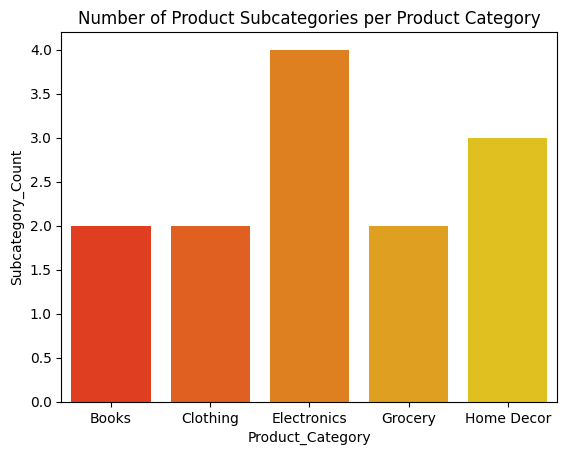

In [52]:
# Number of Product Subcategories per Product Category
groups = data.groupby('Product_Category')['Product_Subcategory'].nunique().reset_index()
groups.rename(columns={'Product_Subcategory': 'Subcategory_Count'}, inplace=True)

sns.barplot(data=groups, x='Product_Category', y='Subcategory_Count', palette='autumn')
plt.title("Number of Product Subcategories per Product Category")

Here we are showcasing the overall distribution of Product_Subcategory of the dataset. We see that there is a clear class imbalance. This causes a bias towarsd Drink, Media, Electronics and Home Decor. We fix this issue using SMOTE.

<Axes: title={'center': 'Product Subcategory Distribution'}, ylabel='count'>

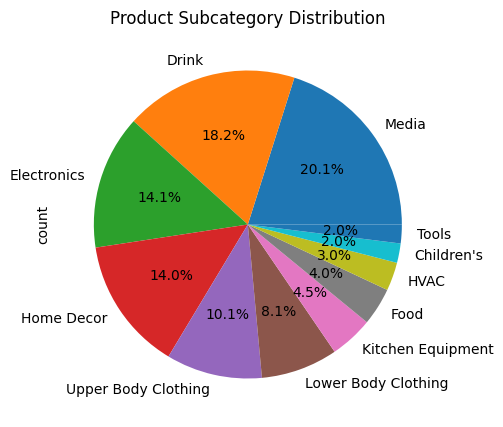

In [53]:
# Product Subcategory Distribution
plt.figure(figsize=(5, 5))
data['Product_Subcategory'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Subcategory Distribution')

ARTEAGA

Text(0.5, 1.0, 'Transaction Amount by Product Subcategory and Customer Segment')

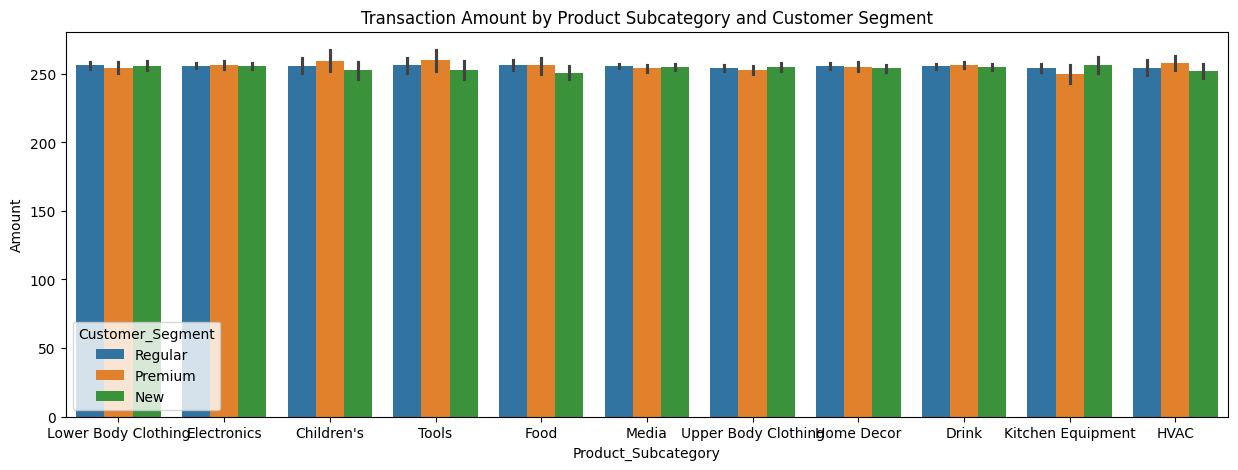

In [54]:
# Product Subcategory vs Amount vs Customer Segment
plt.figure(figsize=(15, 5))
sns.barplot(data=data, x='Product_Subcategory', y='Amount', hue='Customer_Segment')
plt.title("Transaction Amount by Product Subcategory and Customer Segment")

### One-Hot Encoding

Because our data uses categorical data, we one-hot encode to ensure that the feature values are now put into numbers, this allows the dataset to be usable in training the model.

In [55]:
# data_encoded = pd.get_dummies(data, columns=['Gender', 'Feedback', 'Product_Subcategory', 'Income', 'Product_Category', 'Product_Brand', 'Customer_Segment', 'Shipping_Method'], drop_first=True)
data_x = data.drop(columns=['Product_Subcategory'])
data_y = data['Product_Subcategory']

data_x = pd.get_dummies(data_x, columns=['Gender', 'Income', 'Product_Brand', 'Shipping_Method', 'Payment_Method', 'Customer_Segment', 'Product_Category'], drop_first=True)

data = pd.concat([data_x, data_y], axis=1)

### Age Binning
There are many ages that have a relatively small number of transactions, so, to mititgate a large number of transactions for certain ages we will group ages by decades. Additionally, seeing as we only have a small number of records for the 70-80 age range, we will drop those records as we do not have enough transactions for them to make accurate predictions for them.

Age_Range
2    123772
4     55549
3     43483
5     28443
6     25656
1     19148
Name: count, dtype: int64
(296051, 36)


([<matplotlib.axis.XTick at 0x2221a83ca50>,
 [Text(0, 0, '10-19'),
  Text(1, 0, '20-29'),
  Text(2, 0, '30-39'),
  Text(3, 0, '40-49'),
  Text(4, 0, '50-59'),
  Text(5, 0, '60-69')])

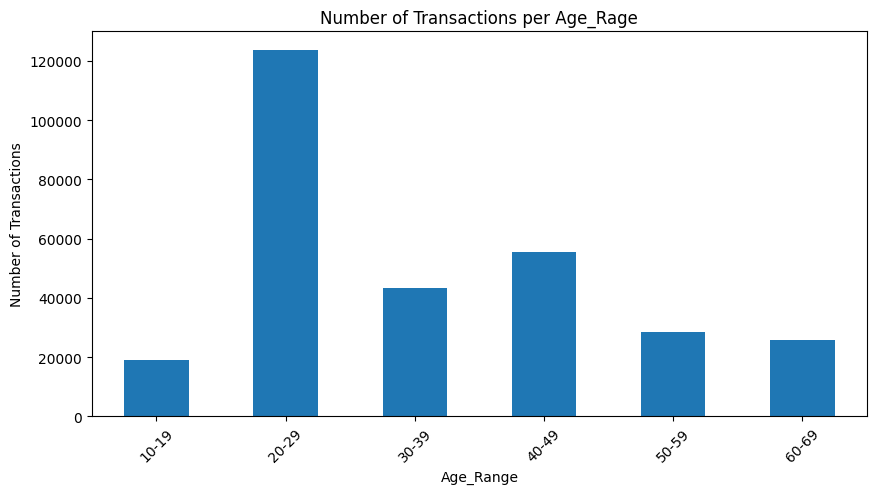

In [56]:
data = data[data['Age'] != 70]
data['Age_Range'] = (data['Age'] // 10).astype(int)
print(data['Age_Range'].value_counts())
data = data.drop(columns=['Age'])
print(data.shape)

age_range_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
ranges = sorted(data['Age_Range'].unique())
labels = [age_range_labels[i - 1] for i in ranges]

plt.figure(figsize=(10, 5))
plt.xlabel('Age_Range')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Age_Rage')
data.groupby('Age_Range').size().plot.bar()

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

### Product_Subcategory SMOTE

Here we deal with the class imbalances in the dataset. We perform SMOTE to artificially make new records so that there is a class balance, as seen with the pie chart, and removes bias towards to the formerly majority class.

In [57]:
data_filtered = data[data['Product_Subcategory'].isin(['Tools', 'Children\'s', 'HVAC', 'Food', 'Kitchen Equipment', 'Lower Body Clothing'])]

x = data_filtered.drop(columns=['Product_Subcategory'])
y = data_filtered['Product_Subcategory']

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)
smote_data_features = pd.DataFrame(x_resampled, columns=x.columns)
smote_data_labels = pd.DataFrame(y_resampled, columns=['Product_Subcategory'])

smote_data = pd.concat([smote_data_features, smote_data_labels], axis=1)

data = pd.concat([data, smote_data], ignore_index=True)

<Axes: title={'center': 'Product Subcategory Distribution After SMOTE'}, ylabel='count'>

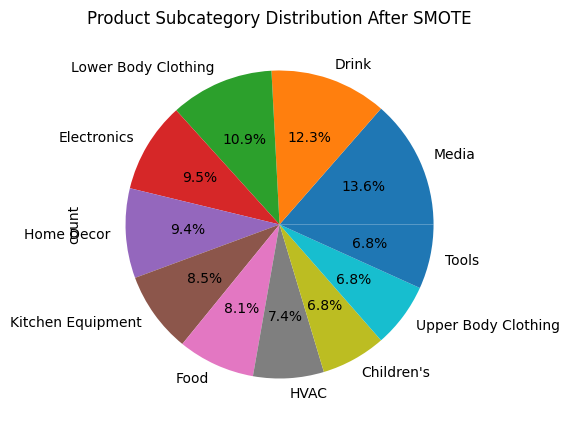

In [58]:
# Product Subcategory Distribution
plt.figure(figsize=(5, 5))
data['Product_Subcategory'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Subcategory Distribution After SMOTE')

### Data Normalization

It is important that data is normalized before applying the model. This allows that the data are all on the same scale.

In [59]:
data_x = data.drop(columns=['Product_Subcategory'])
data_y = data['Product_Subcategory']

In [60]:
data_normalized = data_x.copy()
scaler = StandardScaler()

data_normalized[data_normalized.columns] = scaler.fit_transform(data_normalized[data_normalized.columns])

data_normalized.head()

,Total_Purchases,Amount,Total_Amount,Gender_Male,Income_Low,Income_Medium,Product_Brand_Apple,Product_Brand_Bed Bath & Beyond,Product_Brand_BlueStar,Product_Brand_Coca-Cola,...,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Customer_Segment_Premium,Customer_Segment_Regular,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home Decor,Age_Range
0,-0.822812,-1.040135,-0.924893,0.708119,1.337093,-0.936598,-0.205059,-0.273958,-0.159448,-0.207124,...,-0.730900,1.656757,-0.524494,-0.564508,0.946853,2.159858,-0.574748,-0.505963,-0.507411,-0.751004
1,-1.171443,1.047229,-0.497095,-1.412192,1.337093,-0.936598,-0.205059,-0.273958,-0.159448,-0.207124,...,1.368175,-0.603589,-0.524494,1.771454,-1.056130,-0.462993,1.739891,-0.505963,-0.507411,-1.469897
2,-0.822812,0.701770,-0.269532,0.708119,1.337093,-0.936598,-0.205059,-0.273958,-0.159448,-0.207124,...,1.368175,-0.603589,-0.524494,-0.564508,0.946853,-0.462993,-0.574748,-0.505963,-0.507411,0.686780
3,0.571712,0.687140,0.974470,0.708119,-0.747891,-0.936598,-0.205059,-0.273958,-0.159448,-0.207124,...,-0.730900,-0.603589,1.906600,1.771454,-1.056130,-0.462993,-0.574748,-0.505963,1.970790,1.405672
4,-1.171443,-0.925295,-0.991847,0.708119,1.337093,-0.936598,-0.205059,-0.273958,-0.159448,-0.207124,...,-0.730900,-0.603589,-0.524494,1.771454,-1.056130,-0.462993,-0.574748,1.976429,-0.507411,-0.751004


**Variables for accuracy**

These variables are used to store the results of the models after training. It will be used to asses the overall efficiency of the models used to predict Product_Subcategory.

In [61]:
decision_tree_accuracy = 0
Neural_net_accuracy = 0
SVM_accuracy = 0
KNN_accuracy = 0
Naive_Bayes_accuracy = 0
Ensemble_accuracy = 0

decision_tree_report = None
Neural_net_report = None
SVM_report = None
KNN_report = None
Naive_Bayes_report = None
Ensemble_report = None

## Decision Trees

Here we split the data into a training set and testing set on the non=label data and class labels used for the models.

Then we make the Decision Tree model. We apply grid search on the variables in param_grid so that we get the most effective decision tree.

In [62]:
x_train, x_test, y_train, y_test = train_test_split(data_normalized, data_y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 7, 10, 12],
    'min_samples_split': [ 2, 3, 4],
    'min_samples_leaf': [ 4, 5, 6]
}
"""
The best parameters on the last run were: 
{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Which produced an accuracy of 0.82. However, interestingly it failed to predict and items in the Children's 
or Tools category.
"""


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)

# Train the model
decision_tree = decision_tree.fit(x_train, y_train)

# Make predictions
predictions = decision_tree.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(predictions, y_test) * 100
decision_tree_accuracy = accuracy

print(f"Accuracy: {accuracy:.2f}")

# Calculate Recall, Precision, and F1 Score
print(classification_report(y_test, predictions))
decision_tree_report = classification_report(y_test, predictions)

# Cross Validation Score
scores = cross_val_score(decision_tree, x_train, y_train, cv=5, n_jobs=-1)

c:\Users\josep\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 82.46
                     precision    recall  f1-score   support

         Children's       0.82      0.89      0.85      5974
              Drink       0.92      0.91      0.92     10785
        Electronics       0.80      0.84      0.82      8334
               Food       0.87      0.88      0.88      7091
               HVAC       1.00      1.00      1.00      6598
         Home Decor       0.77      0.76      0.77      8210
  Kitchen Equipment       0.87      0.88      0.88      7345
Lower Body Clothing       0.72      0.79      0.75      9642
              Media       0.82      0.76      0.79     11899
              Tools       0.84      0.84      0.84      6054
Upper Body Clothing       0.59      0.49      0.54      5914

           accuracy                           0.82     87846
          macro avg       0.82      0.82      0.82     87846


## Neural Networks

We build a neural network model.

Param_grid is only two variables with 1 value each because attempting to grid search would take too long to find the most optimal values of each variable. 

In [ ]:
param_grid = {
    'nn__hidden_layer_sizes': [(30,)],
    'nn__activation': ['logistic']
}

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('nn', MLPClassifier())])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

scores = cross_val_score(grid_search, data_x, data_y, cv=5, n_jobs=-1)

Neural_net_accuracy = scores.mean() * 100
print("Accuracy:", Neural_net_accuracy)
Neural_net_report = classification_report(y_test, predictions)
print (Neural_net_report)

## SVMs

We build an SVM model.

Again, param_grid is only 2 variables of 1 value each as it will take too long to grid search for the best values of each variable.

In [ ]:
param_grid = {
    'pca__n_components': [5],
    'svc__kernel': ['linear']
}

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)), ('svc', SVC())])

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search.fit(data_x, data_y)

predictions = cross_val_predict(grid_search, data_x, data_y, cv=5, n_jobs=-1)
SVM_accuracy = accuracy_score(predictions, data_y) * 100
print("Accuracy:", SVM_accuracy)
SVM_report = classification_report(data_y, predictions)
print(SVM_report)

## K-Nearest Neighbor

Before creating the final KNN model, we tuned for the best k value trying n_neighbors=(1, 10) inclusive. After the trials, we found that k=1 returned the highest accuracy, thus the optimal k. Smaller values of k performing better indicate that the dataset contains excess noise or they can be an indicator for complex decision boundaries within our dataset.

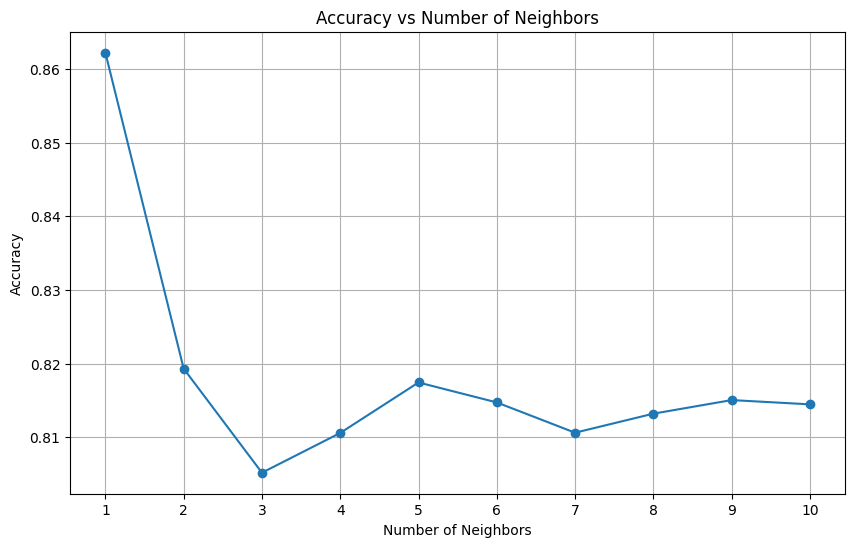


Best number of neighbors: 1
Best accuracy: 86.22%
Final Accuracy with 1 neighbors: 86.2202035380097%


In [ ]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_x)

# tuning for best k
def tune_knn_neighbors(data_x, data_y, max_neighbors=10):
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data_x)
    
    x_train, x_test, y_train, y_test = train_test_split(data_normalized, data_y, test_size=0.2, random_state=42)
    
    # store accuracies for different numbers of neighbors
    accuracies = []
    
    # try different numbers of neighbors
    for n in range(1, max_neighbors + 1):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        
        y_pred_test = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred_test)
        accuracies.append(accuracy)
        
        # print(f"Number of Neighbors: {n}, Accuracy: {accuracy * 100:.2f}%")
    
    # plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_neighbors + 1), accuracies, marker='o')
    plt.title('Accuracy vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, max_neighbors + 1))
    plt.grid(True)
    plt.show()
    
    # find the best number of neighbors
    best_neighbors = accuracies.index(max(accuracies)) + 1
    print(f"\nBest number of neighbors: {best_neighbors}")
    print(f"Best accuracy: {max(accuracies) * 100:.2f}%")
    
    return best_neighbors, accuracies

best_neighbors, accuracies = tune_knn_neighbors(data_x, data_y)

x_train, x_test, y_train, y_test = train_test_split(data_normalized, data_y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_neighbors)
knn.fit(x_train, y_train)

y_pred_test = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test) * 100
KNN_accuracy = accuracy
KNN_report = classification_report(data_y, predictions)
print(KNN_report)
print(f"Final Accuracy with {best_neighbors} neighbors: {accuracy}%")

## Naive Bayes

Build a Naive Bayes Model

In [ ]:
# Build a naive bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Train the model
nb = nb.fit(x_train, y_train)

# Make predictions
predictions = nb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(predictions, y_test) * 100
Naive_Bayes_accuracy = accuracy

print(f"Accuracy: {accuracy:.2f}")
Naive_Bayes_report = classification_report(y_test, predictions)
print(Naive_Bayes_report)

Accuracy: 0.80
                     precision    recall  f1-score   support

         Children's       0.72      1.00      0.83      5974
              Drink       1.00      0.88      0.94     10785
        Electronics       0.78      1.00      0.87      8334
               Food       0.85      1.00      0.92      7091
               HVAC       1.00      1.00      1.00      6598
         Home Decor       0.67      0.71      0.69      8210
  Kitchen Equipment       1.00      0.60      0.75      7345
Lower Body Clothing       0.67      0.75      0.71      9642
              Media       1.00      0.60      0.75     11899
              Tools       0.72      1.00      0.84      6054
Upper Body Clothing       0.50      0.41      0.45      5914

           accuracy                           0.80     87846
          macro avg       0.81      0.81      0.80     87846
       weighted avg       0.83      0.80      0.80     87846



## Ensemble Method

Ensemble method of a random forest, a bunch of decision trees using different features per decision tree.

In [ ]:
# Build an Ensemble Model
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest = random_forest.fit(x_train, y_train)

# Make predictions
predictions = random_forest.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(predictions, y_test) * 100
Ensemble_accuracy = accuracy

print(f"Accuracy: {accuracy:.2f}")
Ensemble_report = classification_report(y_test, predictions)
print(Ensemble_report)

Accuracy: 0.87
                     precision    recall  f1-score   support

         Children's       0.84      0.95      0.89      5974
              Drink       0.99      0.89      0.94     10785
        Electronics       0.79      0.91      0.85      8334
               Food       0.86      0.99      0.92      7091
               HVAC       1.00      1.00      1.00      6598
         Home Decor       0.91      0.77      0.83      8210
  Kitchen Equipment       0.89      0.96      0.92      7345
Lower Body Clothing       0.77      0.92      0.84      9642
              Media       0.90      0.74      0.81     11899
              Tools       0.84      0.95      0.89      6054
Upper Body Clothing       0.82      0.56      0.66      5914

           accuracy                           0.87     87846
          macro avg       0.87      0.88      0.87     87846
       weighted avg       0.88      0.87      0.87     87846



# Final Accuracy

asdf

In [ ]:
models = ['Decision Tree', 'Neural Network', 'SVM', 'KNN', 'Naive Bayes', 'Ensemble']
accuracies = [decision_tree_accuracy, Neural_net_accuracy, SVM_accuracy, KNN_accuracy, Naive_Bayes_accuracy, Ensemble_accuracy]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()

# Final assessments on Precision, Recall, F1-score, and Support

asdf

In [ ]:
metrics = {
    "Decision Tree": {
        "precision": decision_tree_report['macro avg']['precision'],
        "recall": decision_tree_report['macro avg']['recall'],  
        "f1-score": decision_tree_report['macro avg']['f1-score']
    },
    "Neural Network": {
        "precision": Neural_net_report['macro avg']['precision'],
        "recall": Neural_net_report['macro avg']['recall'],
        "f1-score": Neural_net_report['macro avg']['f1-score']
    },
    "SVM": {
        "precision": SVM_report['macro avg']['precision'],
        "recall": SVM_report['macro avg']['recall'],
        "f1-score": SVM_report['macro avg']['f1-score']
    },
    "KNN": {
        "precision": KNN_report['macro avg']['precision'],
        "recall": KNN_report['macro avg']['recall'],
        "f1-score": KNN_report['macro avg']['f1-score']
    },
    "Naive Bayes": {
        "precision": Naive_Bayes_report['macro avg']['precision'],
        "recall": Naive_Bayes_report['macro avg']['recall'],
        "f1-score": Naive_Bayes_report['macro avg']['f1-score']
    },
    "Ensemble": {
        "precision": Ensemble_report['macro avg']['precision'],
        "recall": Ensemble_report['macro avg']['recall'],
        "f1-score": Ensemble_report['macro avg']['f1-score']
    }
}

# Set up the figure and axes for plotting
labels = list(metrics.keys())
precision_scores = [metrics[model]["precision"] for model in labels]
recall_scores = [metrics[model]["recall"] for model in labels]
f1_scores = [metrics[model]["f1-score"] for model in labels]

x = np.arange(len(labels)) 
width = 0.2 

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision_scores, width, label='Precision', color='b')
rects2 = ax.bar(x, recall_scores, width, label='Recall', color='g')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Precision, Recall, F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

# Final assessment


asf